In [1]:
## Importing Pandas as pd 

import pandas as pd

In [27]:
## Ignoring warnings

from warnings import filterwarnings
filterwarnings('ignore')

In [2]:
#Loading data from file

cars_data = pd.read_csv('car_data.csv', sep=',')

In [3]:
cars_data.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [4]:
## Checking the unique values of those categorical columns.

print(cars_data['Fuel_Type'].unique())
print(cars_data['Seller_Type'].unique())
print(cars_data['Transmission'].unique())
print(cars_data['Owner'].unique())

['Petrol' 'Diesel' 'CNG']
['Dealer' 'Individual']
['Manual' 'Automatic']
[0 1 3]


In [5]:
## Getting information of data
cars_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
Car_Name         301 non-null object
Year             301 non-null int64
Selling_Price    301 non-null float64
Present_Price    301 non-null float64
Kms_Driven       301 non-null int64
Fuel_Type        301 non-null object
Seller_Type      301 non-null object
Transmission     301 non-null object
Owner            301 non-null int64
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [6]:
## checking whether there is missing values
## Seems there is no missing values, all 301 entries are not null values.

cars_data.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [7]:
cars_data.columns

Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Kms_Driven',
       'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner'],
      dtype='object')

In [8]:
## creating the final data set by removing car_name which is not impact on 
## prediction of prices as per domain perspective

final_dataset = cars_data[['Year', 'Selling_Price', 'Present_Price', 'Kms_Driven',
       'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner']]

In [9]:
final_dataset.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [10]:
final_dataset['current_year']=2020

In [11]:
## Adding car_age column by finding age of car which is substraction of Current year and year of purchase

final_dataset['car_age'] = final_dataset['current_year'] - final_dataset['Year']

In [12]:
final_dataset.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,current_year,car_age
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,2020,6
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,2020,7
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,2020,3
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,2020,9
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,2020,6


In [13]:
## Droping Year and current_year columns those are not using for train and prediction

final_dataset.drop('Year', axis=1, inplace=True)

In [15]:
final_dataset.drop('current_year', axis=1, inplace=True)

In [14]:
## Encoding categorical columns by pandas get_dummies method

final_dataset = pd.get_dummies(final_dataset, drop_first=True)

In [16]:
final_dataset.head()

,Selling_Price,Present_Price,Kms_Driven,Owner,car_age,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,3.35,5.59,27000,0,6,0,1,0,1
1,4.75,9.54,43000,0,7,1,0,0,1
2,7.25,9.85,6900,0,3,0,1,0,1
3,2.85,4.15,5200,0,9,0,1,0,1
4,4.60,6.87,42450,0,6,1,0,0,1


In [17]:
## Importing matplotlib, seaborn for visualization

import matplotlib.pyplot as plt
%matplotlib inline

In [18]:
import seaborn as sns

In [19]:
## Finding the correlation values to visualize the relation with heatmap.

corr_cars = final_dataset.corr()

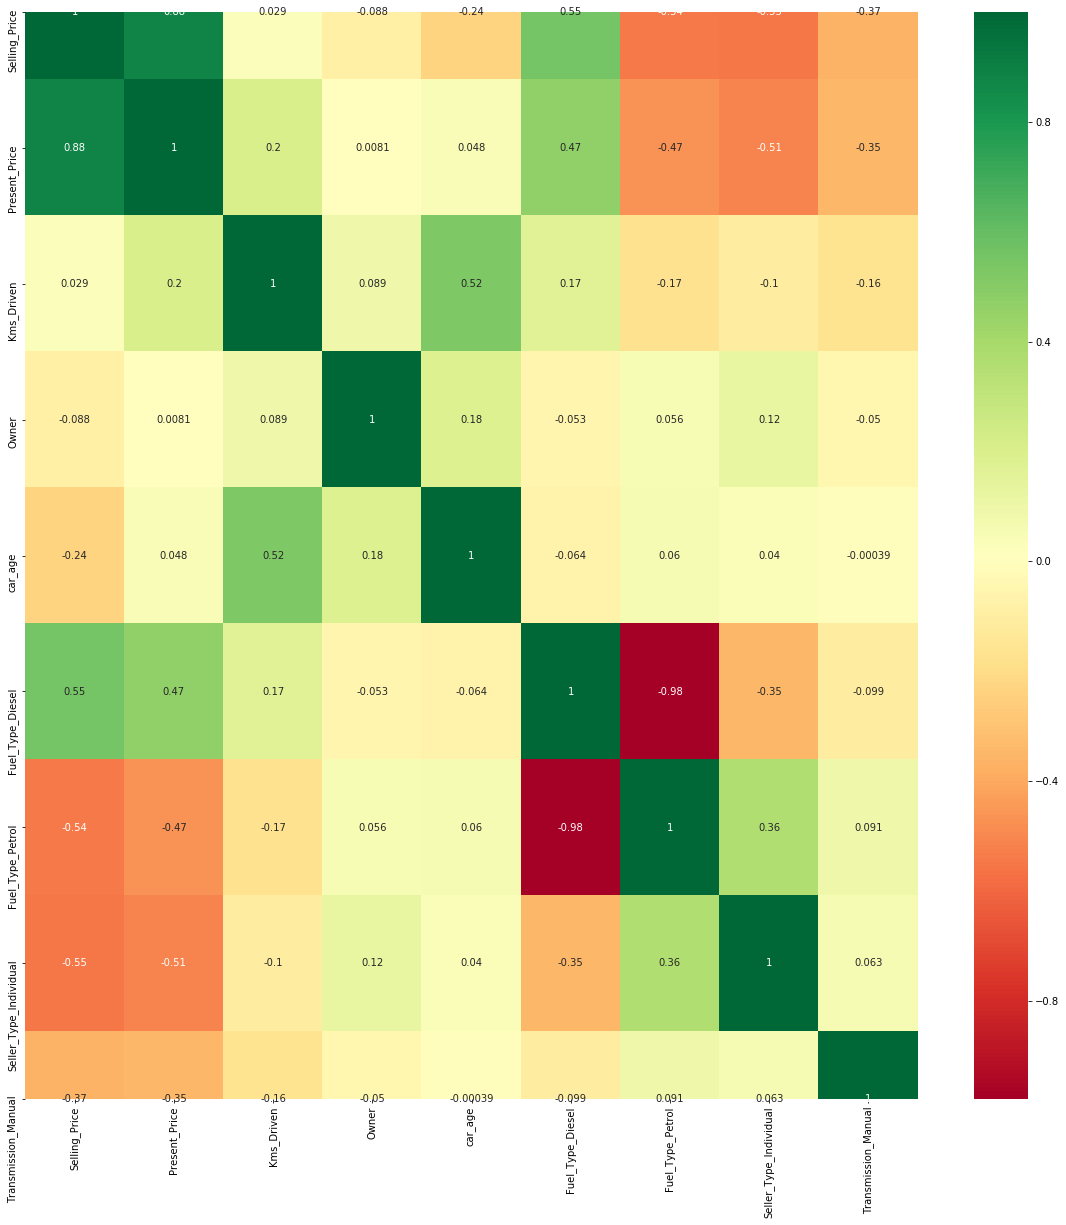

In [20]:
plt.figure(figsize=(20, 20))
g = sns.heatmap(corr_cars, cmap='RdYlGn', annot=True)

In [21]:
corr_cars.index

Index(['Selling_Price', 'Present_Price', 'Kms_Driven', 'Owner', 'car_age',
       'Fuel_Type_Diesel', 'Fuel_Type_Petrol', 'Seller_Type_Individual',
       'Transmission_Manual'],
      dtype='object')

In [22]:
## Seperating features and labels

X = final_dataset.iloc[:, 1:]
y = final_dataset.iloc[:, 0]

In [28]:
## importing ExtraTreesRegressor to get best features

from sklearn.ensemble import ExtraTreesRegressor

model = ExtraTreesRegressor()
model.fit(X, y)

ExtraTreesRegressor(bootstrap=False, criterion='mse', max_depth=None,
                    max_features='auto', max_leaf_nodes=None,
                    min_impurity_decrease=0.0, min_impurity_split=None,
                    min_samples_leaf=1, min_samples_split=2,
                    min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
                    oob_score=False, random_state=None, verbose=0,
                    warm_start=False)

In [29]:
model.feature_importances_

array([3.29179626e-01, 4.29708254e-02, 5.62174200e-04, 7.17717653e-02,
       2.88573541e-01, 8.85588170e-05, 1.24031618e-01, 1.42821891e-01])

In [48]:
columns_importance = pd.Series( index = X.columns , data= model.feature_importances_)

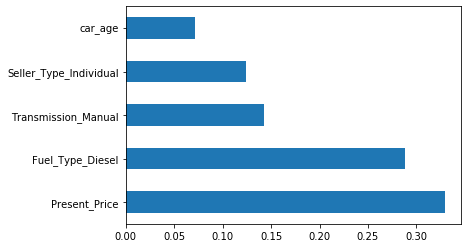

In [51]:
columns_importance.nlargest(5).plot(kind='barh')

In [52]:
columns_importance.nlargest(5).index

Index(['Present_Price', 'Fuel_Type_Diesel', 'Transmission_Manual',
       'Seller_Type_Individual', 'car_age'],
      dtype='object')

In [53]:
final_dataset = final_dataset.loc[:, columns_importance.nlargest(5).index]

In [54]:
final_dataset.head()

,Present_Price,Fuel_Type_Diesel,Transmission_Manual,Seller_Type_Individual,car_age
0,5.59,0,1,0,6
1,9.54,1,1,0,7
2,9.85,0,1,0,3
3,4.15,0,1,0,9
4,6.87,1,1,0,6


In [56]:
## Splitting the data for train and test

from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2)

X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

((240, 8), (61, 8), (240,), (61,))

In [57]:
## Importing RandomForestRegressor algorithm for traing and predictions

from sklearn.ensemble import RandomForestRegressor

rf_regresser = RandomForestRegressor()

In [58]:
import numpy as np

In [63]:
np.linspace(start=100, stop=1200, num=12)

array([ 100.,  200.,  300.,  400.,  500.,  600.,  700.,  800.,  900.,
       1000., 1100., 1200.])

In [65]:
## Hyper Parameters for tuning 

n_estimators = [int(x) for x in np.linspace(start=100, stop=1200, num=12)]
max_features = ['auto', 'sqrt', 'log2']
max_depth = [int(x) for x in np.linspace(start=5, stop=30, num=6)]
min_samples_split = [2, 5, 10, 15, 100]
min_samples_leaf = [1, 2, 5, 10]

In [66]:
## importing RandomizedSearchCV  to tuning for best parameters

from sklearn.model_selection import RandomizedSearchCV

grid_params = {'n_estimators' : n_estimators, 'max_features': max_features, 'max_depth': max_depth, 'min_samples_split': min_samples_split, 'min_samples_leaf': min_samples_leaf}
print(grid_params)


{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200], 'max_features': ['auto', 'sqrt', 'log2'], 'max_depth': [5, 10, 15, 20, 25, 30], 'min_samples_split': [2, 5, 10, 15, 100], 'min_samples_leaf': [1, 2, 5, 10]}


In [68]:
random_cv = RandomizedSearchCV(estimator=rf_regresser, param_distributions=grid_params, 
                               scoring='neg_mean_squared_error', n_iter=10, cv=5, n_jobs=1,
                               random_state=42, verbose=2)

In [69]:
random_cv.fit(X_train, Y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=auto, max_depth=10 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=auto, max_depth=10, total=   1.2s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=auto, max_depth=10 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.2s remaining:    0.0s


[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=auto, max_depth=10, total=   1.3s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=auto, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=auto, max_depth=10, total=   1.2s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=auto, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=auto, max_depth=10, total=   1.1s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=auto, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=auto, max_depth=10, total=   1.1s
[CV] n_estimators=500, min_samples_split=100, min_samples_leaf=5, max_features=auto, max_depth=30 
[CV]  n_estimators=500, min_samples_split=100, min_samples_leaf=5, max_features=auto, max_depth=30, total=   0.6s
[CV] n_estimators=500, min_samples_split=100, mi

[CV]  n_estimators=600, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=15, total=   0.9s
[CV] n_estimators=600, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=15 
[CV]  n_estimators=600, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=15, total=   0.9s
[CV] n_estimators=600, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=15 
[CV]  n_estimators=600, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=15, total=   0.8s
[CV] n_estimators=600, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=15 
[CV]  n_estimators=600, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=15, total=   0.8s
[CV] n_estimators=600, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=15 
[CV]  n_estimators=600, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=15, total=   0.9s
[CV] n_estimators=200, min_samples_split=100, min_sa

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:   40.8s finished


RandomizedSearchCV(cv=5, error_score='raise-deprecating',
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators='warn',
                                                   n_jobs=None, oob_score=False,
                                                   random_sta...


In [70]:
random_cv.best_params_

{'n_estimators': 600,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 15}

In [72]:
## Predicting the prices

predictions = random_cv.predict(X_test)
print(predictions)

[ 2.93667824  0.30188333  3.58320833  1.33825     9.56336875  0.81817292
  0.62197276  2.91673333  7.65566667  3.79325     5.92527407  7.62941667
  0.86191686  5.88779444  0.433       7.38446111  9.61908333  0.66435
  1.40323333  3.87431667  4.92582963  5.21783333  0.58677685  0.77294722
 21.55235     7.50098333  0.59120556  1.21301667  1.10059286  2.43120833
  0.56366111  0.53435     0.55122528  6.21971667  4.50472222  1.17206667
 20.28533333  0.64983199  8.63627269  0.83938333  0.82428333  6.83016667
  0.47705556  1.10007619  3.410296    7.52366667  6.927       7.54084444
  0.58808333  6.50953333  9.3054      0.49381922  0.75608333  0.60891639
  6.63025     4.27616018  0.73653333  8.36995     0.98075     3.73906574
  1.277     ]


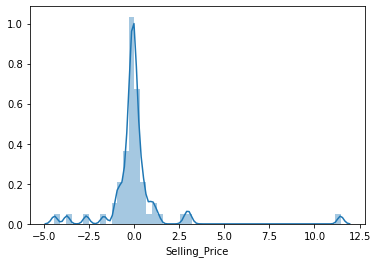

In [76]:
sns.distplot(Y_test-predictions)

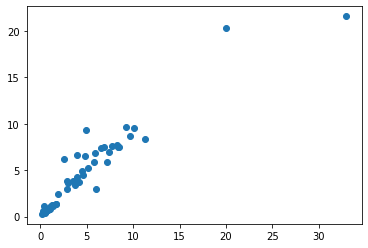

In [77]:
plt.scatter(Y_test, predictions)

In [78]:
## Importing pickle to saving the model to file location

import pickle

In [80]:
file = open('models/cardeko_prediction_model.pkl', 'wb')
pickle.dump(random_cv, file)

In [81]:
## Evaluating the predictions

from sklearn.metrics import mean_squared_error, r2_score

In [85]:
np.sqrt(mean_squared_error(Y_test, predictions ))

1.8255851360903732

In [83]:
r2_score(Y_test, predictions)

0.8796976551898475